<a href="https://colab.research.google.com/github/zulfaikarF99/Beasisw-Sanbercode/blob/main/Zulfaiikar_mentoring_MySkill_Python_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set()

## Hotel Booking Demand Dataset


### Source
Antonio, N., de Almeida, A. and Nunes, L. (2019) “Hotel booking demand datasets,” Data in Brief, 22, pp. 41–49. Available at: https://doi.org/10.1016/j.dib.2018.11.126. 

Downloaded and cleaned data: [tidytuesday](https://github.com/rfordatascience/tidytuesday/tree/master/data/2020/2020-02-11)


### Data Dictionary

|variable                       |class     |description |
|:------------------------------|:---------|:-----------|
|hotel                          |character | Hotel (H1 = Resort Hotel or H2 = City Hotel) |
|is_canceled                    |double    | Value indicating if the booking was canceled (1) or not (0) |
|lead_time                      |double    | Number of days that elapsed between the entering date of the booking into the PMS and the arrival date |
|arrival_date_year              |double    | Year of arrival date|
|arrival_date_month             |character | Month of arrival date|
|arrival_date_week_number       |double    | Week number of year for arrival date|
|arrival_date_day_of_month      |double    | Day of arrival date|
|stays_in_weekend_nights        |double    | Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel |
|stays_in_week_nights           |double    |  Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel|
|adults                         |double    | Number of adults|
|children                       |double    | Number of children|
|babies                         |double    |Number of babies |
|meal                           |character | Type of meal booked. Categories are presented in standard hospitality meal packages: <br> Undefined/SC – no meal package;<br>BB – Bed & Breakfast; <br> HB – Half board (breakfast and one other meal – usually dinner); <br> FB – Full board (breakfast, lunch and dinner) |
|country                        |character | Country of origin. Categories are represented in the ISO 3155–3:2013 format |
|market_segment                 |character | Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators” |
|distribution_channel           |character | Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators” |
|is_repeated_guest              |double    | Value indicating if the booking name was from a repeated guest (1) or not (0) |
|previous_cancellations         |double    | Number of previous bookings that were cancelled by the customer prior to the current booking |
|previous_bookings_not_canceled |double    | Number of previous bookings not cancelled by the customer prior to the current booking |
|reserved_room_type             |character | Code of room type reserved. Code is presented instead of designation for anonymity reasons |
|assigned_room_type             |character | Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons |
|booking_changes                |double    | Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation|
|deposit_type                   |character | Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:<br>No Deposit – no deposit was made;<br>Non Refund – a deposit was made in the value of the total stay cost;<br>Refundable – a deposit was made with a value under the total cost of stay. |
|agent                          |character | ID of the travel agency that made the booking |
|company                        |character | ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons |
|days_in_waiting_list           |double    | Number of days the booking was in the waiting list before it was confirmed to the customer |
|customer_type                  |character | Type of booking, assuming one of four categories:<br>Contract - when the booking has an allotment or other type of contract associated to it;<br>Group – when the booking is associated to a group;<br>Transient – when the booking is not part of a group or contract, and is not associated to other transient booking;<br>Transient-party – when the booking is transient, but is associated to at least other transient booking|
|adr                            |double    | Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights |
|required_car_parking_spaces    |double    | Number of car parking spaces required by the customer |
|total_of_special_requests      |double    | Number of special requests made by the customer (e.g. twin bed or high floor)|
|reservation_status             |character | Reservation last status, assuming one of three categories:<br>Canceled – booking was canceled by the customer;<br>Check-Out – customer has checked in but already departed;<br>No-Show – customer did not check-in and did inform the hotel of the reason why |
|reservation_status_date        |double    | Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel|

In [ ]:
df_hotels = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-11/hotels.csv')
df_hotels.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


Di dataset ini tidak terdapat kolom unique identifier, sehingga untuk latihan ini kita akan menganggap bahwa jika setiap row adalah unik dengan memberikan kolom `id` sebagai unique identifier.

In [ ]:
df_hotels = df_hotels.reset_index().rename(columns={'index':'id'})
df_hotels.head()

,id,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


Cek kolom

In [ ]:
df_hotels.columns

Index(['id', 'hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

Cek data type

In [ ]:
df_hotels.dtypes

id                                  int64
hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                      

Cek jumlah NULL value

In [ ]:
df_hotels.isna().sum(axis=0)

id                                     0
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent           

Cek jumlah unique value

In [ ]:
df_hotels.nunique(axis=0)

id                                119390
hotel                                  2
is_canceled                            2
lead_time                            479
arrival_date_year                      3
arrival_date_month                    12
arrival_date_week_number              53
arrival_date_day_of_month             31
stays_in_weekend_nights               17
stays_in_week_nights                  35
adults                                14
children                               5
babies                                 5
meal                                   5
country                              177
market_segment                         8
distribution_channel                   5
is_repeated_guest                      2
previous_cancellations                15
previous_bookings_not_canceled        73
reserved_room_type                    10
assigned_room_type                    12
booking_changes                       21
deposit_type                           3
agent           

In [ ]:
round(100*(df_hotels.isnull().sum()/len(df_hotels.index)),2)

id                                 0.00
hotel                              0.00
is_canceled                        0.00
lead_time                          0.00
arrival_date_year                  0.00
arrival_date_month                 0.00
arrival_date_week_number           0.00
arrival_date_day_of_month          0.00
stays_in_weekend_nights            0.00
stays_in_week_nights               0.00
adults                             0.00
children                           0.00
babies                             0.00
meal                               0.00
country                            0.41
market_segment                     0.00
distribution_channel               0.00
is_repeated_guest                  0.00
previous_cancellations             0.00
previous_bookings_not_canceled     0.00
reserved_room_type                 0.00
assigned_room_type                 0.00
booking_changes                    0.00
deposit_type                       0.00
agent                             13.69


## Nomor 1

Buatlah fungsi dengan :

*   1 argumen berupa dataframe untuk mengecek data type,
*   untuk mengecek jumlah null value,
*   untuk mengecek percent null value, 
*   serta jumlah unique value tiap kolom yang ada di sebuah dataframe



null value, serta jumlah unique value tiap kolom yang ada di sebuah dataframe

In [ ]:
def check_values(df):
    data = []
    for col in df.columns:
        data.append([col, \
                     df[col].dtype, \
                     df[col].isna().sum(), \
                     round(100*(df[col].isna().sum()/len(df)),2), \
                     df[col].nunique()
                     ])
    return pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique'],data=data)

In [ ]:
check_values(df_hotels)

,dataFeatures,dataType,null,nullPct,unique
0,id,int64,0,0.00,119390
1,hotel,object,0,0.00,2
2,is_canceled,int64,0,0.00,2
3,lead_time,int64,0,0.00,479
4,arrival_date_year,int64,0,0.00,3
5,arrival_date_month,object,0,0.00,12
6,arrival_date_week_number,int64,0,0.00,53
7,arrival_date_day_of_month,int64,0,0.00,31
8,stays_in_weekend_nights,int64,0,0.00,17
9,stays_in_week_nights,int64,0,0.00,35


## Nomor 2
Ada berapa berapa jumlah pengunjung yang membatalkan reservasi dan yang tidak? Dan dari jumlah tersebut buatlah kesimpulan mengenai proporsisi masing-masing!

In [ ]:
df_hotels.is_canceled.value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [ ]:
df_hotels.is_canceled.value_counts(normalize=True)

0    0.629584
1    0.370416
Name: is_canceled, dtype: float64

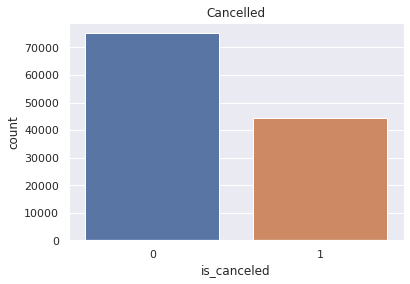

In [ ]:
sns.countplot(data=df_hotels, x='is_canceled')
plt.title('Cancelled')
plt.show()

Ternyata terdapat lumayan banyak pengunjung yang membatalkan reservasi, hingga 37% dari seluruh pengunjung.



## Nomor 3

A. Untuk "City Hotel", berapa persen reservasi yang dibatalkan?

B. Untuk "Resort Hotel", berapa persen reservasi yang dibatalkan?



In [ ]:
df_hotels[df_hotels.hotel=='City Hotel'].is_canceled.value_counts(normalize=True)

0    0.58273
1    0.41727
Name: is_canceled, dtype: float64

In [ ]:
len(df_hotels[(df_hotels.hotel=='City Hotel')&(df_hotels.is_canceled==1)]) / len(df_hotels[(df_hotels.hotel=='City Hotel')])

0.41726963317786464

In [ ]:
df_hotels[df_hotels.hotel=='Resort Hotel'].is_canceled.value_counts(normalize=True)

0    0.722366
1    0.277634
Name: is_canceled, dtype: float64

In [ ]:
len(df_hotels[(df_hotels.hotel=='Resort Hotel')&(df_hotels.is_canceled==1)]) / len(df_hotels[(df_hotels.hotel=='Resort Hotel')])

0.27763354967548676

Di hotel jenis apa ditemukan proposi reservasi yang dibatalkan lebih besar?

## Nomor 4

Lakukan filter sehingga hanya menampilkan data pengunjung yang tidak membatalkan reservasi. Dan **simpan hasilnya** dalam variabel `df_checkout`.

In [ ]:
df_hotels[df_hotels.is_canceled==0]

,id,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,119385,City Hotel,0,23,2017,August,35,30,2,5,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,119386,City Hotel,0,102,2017,August,35,31,2,5,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,119387,City Hotel,0,34,2017,August,35,31,2,5,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,119388,City Hotel,0,109,2017,August,35,31,2,5,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
df_checkout = df_hotels[df_hotels.is_canceled==0]
df_checkout.shape

(75166, 33)

## Nomor 5

A. Tampilkan jumlah reservasi tiap bulan kedatangan untuk masing-masing jenis hotel. 

B. Lalu di bulan apa terdapat reservasi yang paling banyak di masing-masing jenis hotel? **Buatlah kesimpulan** apakah trennya sama di kedua jenis hotel?

**> (!) Untuk pertanyaan ini dan selanjutnya akan menggunakan dataframe `df_checkout`**

In [ ]:
df_checkout.is_canceled.value_counts()

0    75166
Name: is_canceled, dtype: int64

In [ ]:
df_checkout.groupby(['hotel','arrival_date_month']).size()

hotel         arrival_date_month
City Hotel    April                 4015
              August                5381
              December              2392
              February              3064
              January               2254
              July                  4782
              June                  4366
              March                 4072
              May                   4579
              November              2696
              October               4337
              September             4290
Resort Hotel  April                 2550
              August                3257
              December              2017
              February              2308
              January               1868
              July                  3137
              June                  2038
              March                 2573
              May                   2535
              November              1976
              October               2577
              September 

In [ ]:
df_checkout.groupby(['hotel','arrival_date_month'])['id'].nunique()

hotel         arrival_date_month
City Hotel    April                 4015
              August                5381
              December              2392
              February              3064
              January               2254
              July                  4782
              June                  4366
              March                 4072
              May                   4579
              November              2696
              October               4337
              September             4290
Resort Hotel  April                 2550
              August                3257
              December              2017
              February              2308
              January               1868
              July                  3137
              June                  2038
              March                 2573
              May                   2535
              November              1976
              October               2577
              September 

Melakukan mapping nama bulan menjadi bulan dalam angka

In [ ]:
import calendar

month_dict = {month: index for index, month in enumerate(calendar.month_name) if month}
month_dict

{'January': 1,
 'February': 2,
 'March': 3,
 'April': 4,
 'May': 5,
 'June': 6,
 'July': 7,
 'August': 8,
 'September': 9,
 'October': 10,
 'November': 11,
 'December': 12}

In [ ]:
# di langkah ini, tiap baris dari kolom arrival_date_month yang berisi nama bulan akan di-mapping ke angka yang sesuai
df_checkout['arrival_date_month_num'] = df_checkout['arrival_date_month'].map(month_dict)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_checkout.groupby(['hotel','arrival_date_month_num']).size()

hotel         arrival_date_month_num
City Hotel    1                         2254
              2                         3064
              3                         4072
              4                         4015
              5                         4579
              6                         4366
              7                         4782
              8                         5381
              9                         4290
              10                        4337
              11                        2696
              12                        2392
Resort Hotel  1                         1868
              2                         2308
              3                         2573
              4                         2550
              5                         2535
              6                         2038
              7                         3137
              8                         3257
              9                         2102
              10  

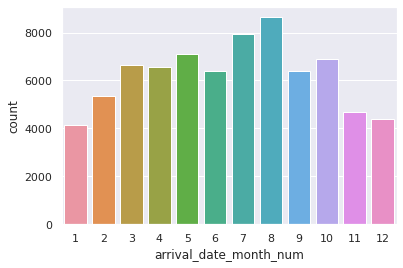

In [ ]:
sns.countplot(data=df_checkout, x='arrival_date_month_num')

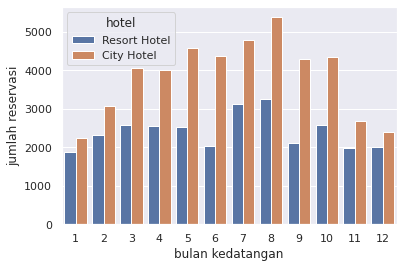

In [ ]:
sns.countplot(data=df_checkout, x='arrival_date_month_num',hue='hotel')
plt.xlabel('bulan kedatangan')
plt.ylabel('jumlah reservasi')
plt.show()

## Nomor 6

A. Buat sebuah kolom baru bernama `arrival_date` yang berisi info lengkap tentang tahun, bulan, dan tanggal kedatangan. 

B. Ubah kolom menjadi tipe datetime.

Hint: gabungkan tahun, bulan, dan tanggal menjadi format `yyyy-mm-dd`

In [ ]:
# langkah 1: mengubah kolom arrival_date_month_num menjadi string
df_checkout.arrival_date_month_num.astype('str')

0         7
1         7
2         7
3         7
4         7
         ..
119385    8
119386    8
119387    8
119388    8
119389    8
Name: arrival_date_month_num, Length: 75166, dtype: object

In [ ]:
# langkah 1: mengubah kolom arrival_date_month_num menjadi string
# langkah 2: lalu menambahkan zero padding, sehingga '1' menjadi '01' --> langkah 2 di-chain dengan langkah 1
df_checkout.arrival_date_month_num.astype('str').str.pad(2,fillchar='0')

0         07
1         07
2         07
3         07
4         07
          ..
119385    08
119386    08
119387    08
119388    08
119389    08
Name: arrival_date_month_num, Length: 75166, dtype: object

In [ ]:
df_checkout['arrival_date_year'].astype('str') + '-' +\
 df_checkout.arrival_date_month_num.astype('str').str.pad(2,fillchar='0') + '-' +\
 df_checkout.arrival_date_day_of_month.astype('str').str.pad(2,fillchar='0')

0         2015-07-01
1         2015-07-01
2         2015-07-01
3         2015-07-01
4         2015-07-01
             ...    
119385    2017-08-30
119386    2017-08-31
119387    2017-08-31
119388    2017-08-31
119389    2017-08-29
Length: 75166, dtype: object

In [ ]:
df_checkout['arrival_date'] = \
    df_checkout['arrival_date_year'].astype('str') + '-' +\
    df_checkout.arrival_date_month_num.astype('str').str.pad(2,fillchar='0') + '-' +\
    df_checkout.arrival_date_day_of_month.astype('str').str.pad(2,fillchar='0')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
df_checkout['arrival_date']

0         2015-07-01
1         2015-07-01
2         2015-07-01
3         2015-07-01
4         2015-07-01
             ...    
119385    2017-08-30
119386    2017-08-31
119387    2017-08-31
119388    2017-08-31
119389    2017-08-29
Name: arrival_date, Length: 75166, dtype: object

In [ ]:
df_checkout.arrival_date.dtype

dtype('O')

In [ ]:
# ubah arrival_date dari string menjadi datetime 
df_checkout['arrival_date'] = pd.to_datetime(df_checkout.arrival_date)
df_checkout['arrival_date']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0        2015-07-01
1        2015-07-01
2        2015-07-01
3        2015-07-01
4        2015-07-01
            ...    
119385   2017-08-30
119386   2017-08-31
119387   2017-08-31
119388   2017-08-31
119389   2017-08-29
Name: arrival_date, Length: 75166, dtype: datetime64[ns]

In [ ]:
df_checkout.arrival_date.dtype

dtype('<M8[ns]')

## Nomor 7 

Mari kita bermain dengan time-series data menggunakan kolom `arrival_date`. Buat 2 dataframe yang menunjukkan sbb:
1. total reservasi harian (`df_reservasi_perhari`)
2. rata-rata reservasi harian di tiap minggu (`df_avg_reservasi_harian`)

> **(!) Stop and think!**

> Apa perbedaan data yang ditunjukkan oleh `df_reservasi_perhari` dan `df_avg_reservasi_harian`?

In [ ]:
df_reservasi_perhari = df_checkout.resample('D',on='arrival_date').size().reset_index().rename(columns={0:'total_reservasi'})
df_reservasi_perhari

,arrival_date,total_reservasi
0,2015-07-01,103
1,2015-07-02,36
2,2015-07-03,37
3,2015-07-04,45
4,2015-07-05,37
...,...,...
788,2017-08-27,125
789,2017-08-28,147
790,2017-08-29,81
791,2017-08-30,62


In [ ]:
df_avg_reservasi_harian = df_checkout.resample('D',on='arrival_date').size().reset_index().rename(columns={0:'total_reservasi'}).\
resample('W',on='arrival_date')['total_reservasi'].mean().reset_index()
df_avg_reservasi_harian

,arrival_date,total_reservasi
0,2015-07-05,51.600000
1,2015-07-12,40.571429
2,2015-07-19,53.857143
3,2015-07-26,53.000000
4,2015-08-02,47.142857
...,...,...
109,2017-08-06,101.000000
110,2017-08-13,98.000000
111,2017-08-20,103.714286
112,2017-08-27,103.142857


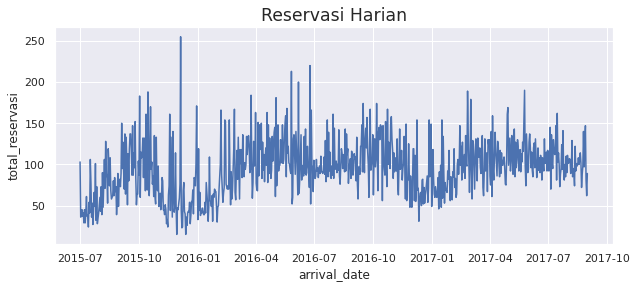

In [ ]:
plt.figure(figsize=(10,4))
sns.lineplot(data=df_reservasi_perhari, x='arrival_date', y='total_reservasi')
plt.title('Reservasi Harian', fontsize='x-large')
plt.show()

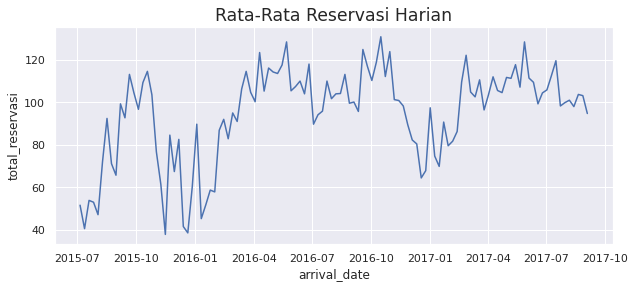

In [ ]:
plt.figure(figsize=(10,4))
sns.lineplot(data=df_avg_reservasi_harian, x='arrival_date', y='total_reservasi')
plt.title('Rata-Rata Reservasi Harian', fontsize='x-large')
plt.show()

## Nomor 8 

A. Berapa rata-rata ADR berdasarkan jenis hotel dan jenis customer (`customer_type`)? 

B. Jenis customer mana yang memiliki ADR paling besar di masing-masing jenis hotel?

In [ ]:
df_checkout.groupby(['hotel','customer_type'])['adr'].mean()

hotel         customer_type  
City Hotel    Contract           108.929255
              Group               87.398712
              Transient          110.423280
              Transient-Party     93.705007
Resort Hotel  Contract            78.581674
              Group               77.306575
              Transient           96.001928
              Transient-Party     77.204010
Name: adr, dtype: float64

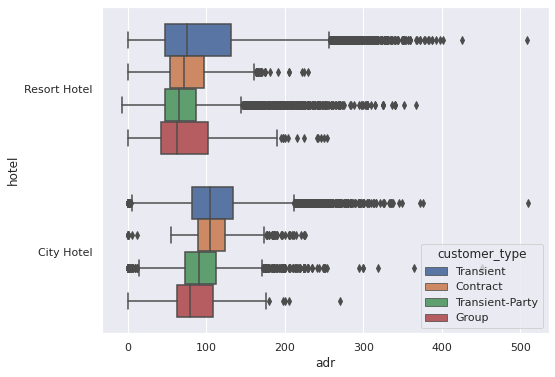

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_checkout, x='adr', y='hotel',hue='customer_type')
plt.show()

## Nomor 9 (BONUS)

Dengan menggunakan dataframe `df_country` yang berisi informasi nama negara dan kode negaranya, 
**Tampilkan** 10 negara dengan jumlah booking terbesar!

Langkah:
1. Gabungkan dataframe `df_checkout` dan `df_country`. Gunakan kolom `Alpha-3 code` untuk mendapatkan nama negara.
2. Tampilkan 10 negara (dengan namanya, bukan kode negara) dengan jumlah booking terbesar

In [ ]:
df_country = pd.read_csv('https://gist.githubusercontent.com/tadast/8827699/raw/f5cac3d42d16b78348610fc4ec301e9234f82821/countries_codes_and_coordinates.csv')
df_country.head()

,Country,Alpha-2 code,Alpha-3 code,Numeric code,Latitude (average),Longitude (average)
0,Afghanistan,"""AF""","""AFG""","""4""","""33""","""65"""
1,Albania,"""AL""","""ALB""","""8""","""41""","""20"""
2,Algeria,"""DZ""","""DZA""","""12""","""28""","""3"""
3,American Samoa,"""AS""","""ASM""","""16""","""-14.3333""","""-170"""
4,Andorra,"""AD""","""AND""","""20""","""42.5""","""1.6"""


> **(!) Stop and think!**

> 1. Apakah kita bisa langsung menggunakan kolom `Alpha-3 code` sebagai join key dengan dataset hotel kita?

> 2. Apakah semua kode negara yang ada di kolom `country` dataset hotel kita bisa ditemukan di `df_country`?

In [ ]:
df_checkout.country

0         PRT
1         PRT
2         GBR
3         GBR
4         GBR
         ... 
119385    BEL
119386    FRA
119387    DEU
119388    GBR
119389    DEU
Name: country, Length: 75166, dtype: object

In [ ]:
df_country.code

0      AFG
1      ALB
2      DZA
3      ASM
4      AND
      ... 
251    WLF
252    ESH
253    YEM
254    ZMB
255    ZWE
Name: code, Length: 256, dtype: object

In [ ]:
df_country['code'] = df_country['Alpha-3 code'].str.replace('"','').str.strip()

In [ ]:
df_merged = pd.merge(df_checkout[['id','country']],
                     df_country[['Country','code']],
                     left_on='country',
                     right_on='code',
                     indicator=True,
                     how='left')
df_merged.head()

,id,country,Country,code,_merge
0,0,PRT,Portugal,PRT,both
1,1,PRT,Portugal,PRT,both
2,2,GBR,United Kingdom,GBR,both
3,3,GBR,United Kingdom,GBR,both
4,4,GBR,United Kingdom,GBR,both


Mengecek berapa banyak row data kita yang bisa di-merge dengan `df_country`

In [ ]:
df_merged._merge.value_counts()

both          74269
left_only      1448
right_only        0
Name: _merge, dtype: int64

In [ ]:
df_merged[df_merged._merge=='left_only']['country'].unique()

array([nan, 'CN', 'TMP'], dtype=object)

In [ ]:
set(df_checkout.country) - set(df_country['code'])

{'CN', 'TMP', nan}

Didapatkan bahwa hanya ada 3 `country` yang tidak bisa di-map ke `df_country`, dan ketiga negara tersebut tidak ada di Top 10 negara asal booking, sehingga cukup bagi kita menggunakan `df_merged`.

In [ ]:
df_merged.Country.value_counts().head(10)

Portugal          21071
United Kingdom     9676
France             8481
Spain              6391
Germany            6069
Ireland            2543
Italy              2433
Belgium            1868
Netherlands        1717
United States      1596
Name: Country, dtype: int64

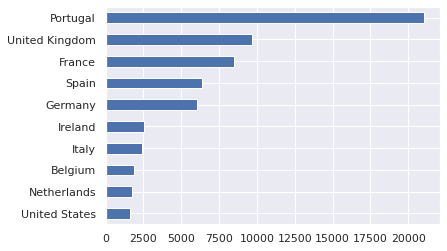

In [ ]:
df_merged.Country.value_counts().head(10).sort_values(ascending=True).plot.barh()
plt.show()

## Nomor 10 (BONUS)
A. Berapa banyak tamu yang menginap untuk tiap reservasi? 

B. Berdasarkan dataset, berapa jumlah tamu paling banyak? Tampilkan juga baris data reservasi yang memiliki jumlah tamu paling banyak.

In [ ]:
df_checkout.columns

Index(['id', 'hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date',
       'arrival_date_month_num', 'arrival_date'],
      dtype='object')

In [ ]:
df_checkout['total_guest'] = df_checkout.adults + df_checkout.children + df_checkout.babies

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_checkout.total_guest.describe()

count    75166.000000
mean         1.942461
std          0.669966
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         12.000000
Name: total_guest, dtype: float64

In [ ]:
df_checkout.total_guest.max()

12.0

In [ ]:
df_checkout[df_checkout.total_guest==df_checkout.total_guest.max()].T

,46619
id,46619
hotel,City Hotel
is_canceled,0
lead_time,37
arrival_date_year,2016
arrival_date_month,January
arrival_date_week_number,3
arrival_date_day_of_month,12
stays_in_weekend_nights,0
stays_in_week_nights,2
